<a href="https://colab.research.google.com/github/Dkolomy/BMV-Research/blob/main/PuttingItAllTogether_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


'2.9.0+cpu'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
# Create some data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

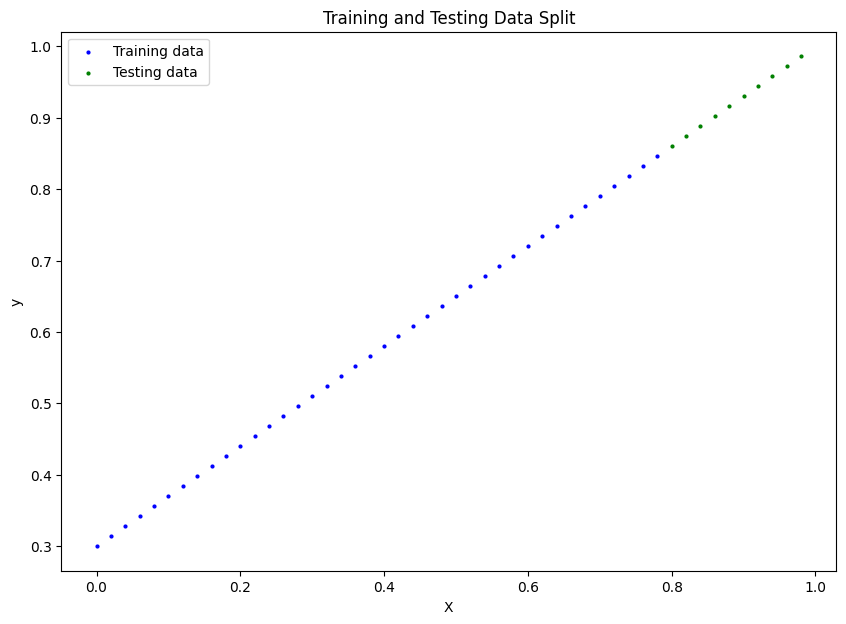

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', s=4, label='Training data')
plt.scatter(X_test, y_test, c='g', s=4, label='Testing data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Testing Data Split')
plt.legend()
plt.show()

In [6]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    # self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  # def forward(self, x: torch.Tensor) -> torch.Tensor:
  #   return self.weight * x + self.bias

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)

# Create an instance of the model
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [7]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [8]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [9]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [10]:
from numpy import test
torch.manual_seed(42)
epochs = 200

# Put data on a target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [11]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [12]:
# Turn model into evaluation mode

model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

y_pred

tensor([[0.2925],
        [0.3064],
        [0.3202],
        [0.3341],
        [0.3479],
        [0.3618],
        [0.3757],
        [0.3895],
        [0.4034],
        [0.4172],
        [0.4311],
        [0.4449],
        [0.4588],
        [0.4727],
        [0.4865],
        [0.5004],
        [0.5142],
        [0.5281],
        [0.5420],
        [0.5558],
        [0.5697],
        [0.5835],
        [0.5974],
        [0.6112],
        [0.6251],
        [0.6390],
        [0.6528],
        [0.6667],
        [0.6805],
        [0.6944],
        [0.7083],
        [0.7221],
        [0.7360],
        [0.7498],
        [0.7637],
        [0.7775],
        [0.7914],
        [0.8053],
        [0.8191],
        [0.8330]], grad_fn=<AddmmBackward0>)

In [13]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  plt.legend(prop={'size': 14})

  plt.show()

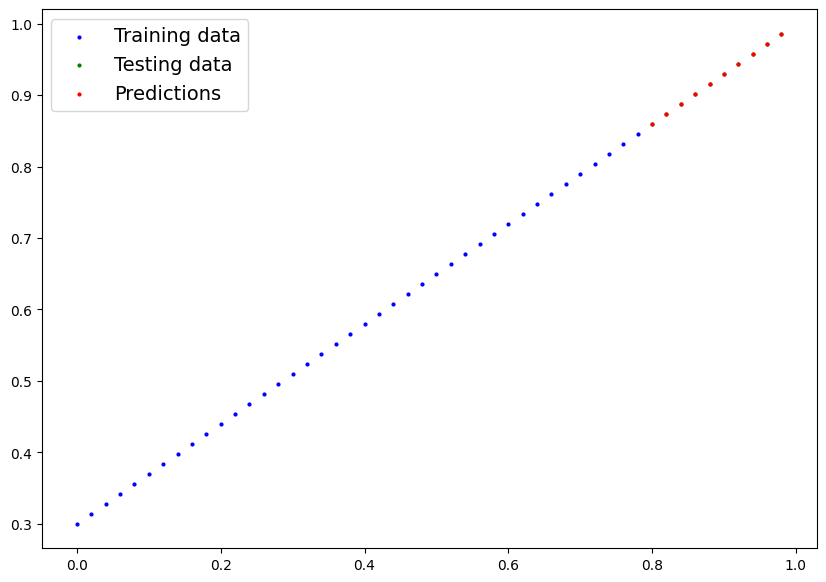

In [14]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())


### Saving and loading a trained model

In [18]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the modle state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [20]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])